In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from pathlib import Path
import supy as sp
import os
from shutil import copyfile
import geopandas as gpd
import pickle
pd.options.mode.chained_assignment = None
from IPython.display import clear_output


In [18]:
sp.show_version()

supy: 2019.10.24  
supy_driver: 2019a17


In [19]:
def generate_array_dif(attrs_site, attr,level):
    dar = [0.25,0.25,.25]
    dar[level] = attrs_site[attr].values[0]
    return dar


def generate_array_same(attrs_site, attr):
    a = attrs_site[attr].values[0]
    return [a, a, a]


def modify_attr(df_state_init, df, name):

    all_attrs = pd.read_csv('all_attrs.csv')
    attrs_site = all_attrs[all_attrs.site == name]
    df_state_init.loc[:, 'emissionsmethod'] = 0
    df_state_init.loc[:,'roughlenheatmethod']=1
    

    if attrs_site.land.values[0] == 'DecTr':
        ar = [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0]
        level = 1
        df_state_init.albmin_dectr=attrs_site['albmin'].values[0]
        df_state_init.albmax_dectr=attrs_site['albmax'].values[0]
        df_state_init.albdectr_id=df_state_init.albmin_dectr
        df_state_init.loc[:, 'dectreeh'] = attrs_site.height.values[0]

    elif attrs_site.land.values[0] == 'EveTr':
        ar = [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
        level = 0
        df_state_init.albmin_evetr=attrs_site['albmin'].values[0]
        df_state_init.albmax_evetr=attrs_site['albmax'].values[0]
        df_state_init.albevetr_id=df_state_init.albmin_evetr
        df_state_init.loc[:, 'evetreeh'] = attrs_site.height.values[0]

    elif attrs_site.land.values[0] == 'Grass':
        ar = [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]
        level = 2
        df_state_init.albmin_grass=attrs_site['albmin'].values[0]
        df_state_init.albmax_grass=attrs_site['albmax'].values[0]
        df_state_init.loc[:,'roughlenmommethod']=1
        df_state_init.albgrass_id=df_state_init.albmin_grass
#         df_state_init.loc[:,'z0m_in']=attrs_site.height.values[0]*.1
#         df_state_init.loc[:,'zdm_in']=attrs_site.height.values[0]*.7
        df_state_init.loc[:,'z0m_in']=0.3*.1
        df_state_init.loc[:,'zdm_in']=0.3*.7
    else:
        print('The land cover type is not found! using the default one')

    df_state_init.loc[:, 'sfr'] = ar
    df_state_init.loc[:, 'lat'] = df.Latitude.values[0].values[0]
    df_state_init.loc[:, 'lng'] = df.Longitude.values[0].values[0]
    df_state_init.loc[:, 'z'] = attrs_site.meas.values[0]
    df_state_init.loc[:, 'laimin'] = generate_array_dif(attrs_site, 'laimin',level)
    df_state_init.loc[:, 'laimax'] = generate_array_dif(attrs_site, 'laimax',level)
    df_state_init.loc[:, 'gddfull'] = generate_array_same(attrs_site, 'gddfull')
    df_state_init.loc[:, 'sddfull'] = generate_array_same(attrs_site, 'sddfull')
    df_state_init.loc[:, 'basete'] = generate_array_same(attrs_site, 'basete')
    df_state_init.loc[:, 'baset'] = generate_array_same(attrs_site, 'baset')
    df_state_init.lai_id = df_state_init.loc[:, 'laimin']
    
    

    return df_state_init,level


def func_parse_date(year, doy, hour, min):
    dt = pd.to_datetime(' '.join([str(k) for k in [year, doy, hour, min]]),
                        format='%Y %j %H %M')
    return dt


In [20]:
# name='crop'

# df = pd.read_csv('MODIS_LAI_AmeriFlux/statistics_Lai_500m-' + name +
#                  '.csv')
# if name!='crop':
#     df.columns = ['product'
#                   ] + [i.split(' ')[1] for i in df.columns if i != 'product']

# df = df.filter(['modis_date', 'value_mean'])

# df_period = df
# df_period.loc[:, 'year'] = [
#     int(i.split('A')[1][0:4]) for i in df_period.modis_date
# ]
# df_period.loc[:, 'DOY'] = [
#     int(i.split('A' + str(year))[1]) for i,year in zip(df_period.modis_date,df_period.year)
# ]
# df_period = df_period.set_index('DOY')
# df_period['datetime']=[datetime.datetime(year, 1, 1) + datetime.timedelta(x- 1) for x,year in 
#                        zip(df_period.index,df_period.year)]

# copyfile("./runs/data/" + name + "_" + 'all' + "_data_60.txt",
#          "runs/run/input/Kc_2012_data_60.txt")
# df_forcing = pd.read_csv('runs/run' + '/Input/' + 'kc' + '_' + '2012' +
#                          '_data_60.txt',
#                          sep=' ',
#                          parse_dates={'datetime': [0, 1, 2, 3]},
#                          keep_date_col=True,
#                          date_parser=func_parse_date)

# all_sites_info = pd.read_csv('site_info.csv')
# site_info = all_sites_info[all_sites_info['Site Id'] == name]
# df = pd.DataFrame({
#     'Site': [name],
#     'Latitude': [site_info['Latitude (degrees)']],
#     'Longitude': [site_info['Longitude (degrees)']]
# })

# path_runcontrol = Path('runs/run' + '/') / 'RunControl.nml'
# df_state_init = sp.init_supy(path_runcontrol)


# grid = df_state_init.index[0]
# df_forcing_run = sp.load_forcing_grid(path_runcontrol, grid)

In [21]:
# year=2016

# if year==2014:
#     date1='2014-06-21'
#     date2='2014-11-09'
#     date1_1=datetime.datetime(2014,8,5)
#     date1_2=datetime.datetime(2014,10,1)
# elif year==2015:
#     date1='2015-06-20'
#     date2='2015-11-07'
#     date1_1=datetime.datetime(2015,8,10)
#     date1_2=datetime.datetime(2015,10,2)
# elif year==2016:
#     date1='2016-06-16'
#     date2='2016-11-05'
#     date1_1=datetime.datetime(2016,8,6)
#     date1_2=datetime.datetime(2016,10,1)
    
# name='crop'
# df_forcing_run_2=df_forcing_run.loc[date1:date2]
# df_state_init ,level= modify_attr(df_state_init, df, name)
# df_state_init.loc[:,'sdd_id']=[0,0,0]
# df_output, df_state_final = sp.run_supy(df_forcing_run_2,
#                                         df_state_init,
#                                         save_state=False)

# fig, axs = plt.subplots(1,2,figsize=(17,5))

# ax=axs[0]
# df_output_2 = df_output.loc[grid, :]
# a=df_period.filter(['datetime','value_mean']).set_index('datetime').loc[date1:date2]
# a.plot(ax=ax,marker='o',color='b')
# ax.tick_params(axis='y', labelcolor='b')                                                                                       
# ax.set_ylabel('LAI (MODIS)',color='b')



# ax1=ax.twinx()
# GDD_s=0.5*(df_forcing_run_2.Tair.resample('1D').max()+df_forcing_run_2.Tair.resample('1D').min())
# b=GDD_s.cumsum()
# b[a.index].plot(ax=ax1,alpha=0.5,color='r')
# ax1.tick_params(axis='y', labelcolor='r')
# ax1.set_ylabel('GDD (baseT=0 $\degree$C)',color='r')



# bb=b[b.index==date1_1]

# val1=np.round(bb.values.copy()[0],1)
# bb.iloc[0]=4
# bb=bb.append(bb)
# bb.iloc[1]=0
# bb.plot(ax=ax,color='k',linestyle='--')


# bb=b[b.index==date1_2]
# val2=np.round(bb.values.copy()[0],1)
# bb.iloc[0]=4
# bb=bb.append(bb)
# bb.iloc[1]=0
# bb.plot(ax=ax,color='m',linestyle='--')

# ax.set_ylim([0,5])
# ax.legend(['LAI','Start of reproductive: GDD =  '+str(val1),'Start of ripenning: GDD =  '+str(val2)])
# plt.title('Rice-'+date1[0:4]+'-'+str(int(date1[0:4])+1))






# if year==2014:
#     date1='2014-12-15'
#     date2='2015-05-31'
#     date1_1=datetime.datetime(2015,5,1)
#     date1_2=datetime.datetime(2015,4,16)
# elif year==2015:
#     date1='2015-12-10'
#     date2='2016-05-25'
#     date1_1=datetime.datetime(2016,5,1)
#     date1_2=datetime.datetime(2016,4,17)
# elif year==2016:
#     date1='2016-12-14'
#     date2='2017-05-31'
#     date1_1=datetime.datetime(2017,5,1)
#     date1_2=datetime.datetime(2017,4,15)
    
# name='crop2'
# df_forcing_run_2=df_forcing_run.loc[date1:date2]
# df_state_init ,level= modify_attr(df_state_init, df, name)
# df_state_init.loc[:,'sdd_id']=[0,0,0]
# df_output, df_state_final = sp.run_supy(df_forcing_run_2,
#                                         df_state_init,
#                                         save_state=False)
# ax=axs[1]

# df_output_2 = df_output.loc[grid, :]
# a=df_period.filter(['datetime','value_mean']).set_index('datetime').loc[date1:date2]
# a.plot(ax=ax,marker='o',color='b')
# ax.tick_params(axis='y', labelcolor='b')                                                                                       
# ax.set_ylabel('LAI (MODIS)',color='b')



# ax1=ax.twinx()
# GDD_s=0.5*(df_forcing_run_2.Tair.resample('1D').max()+df_forcing_run_2.Tair.resample('1D').min())
# b=GDD_s.cumsum()
# b[a.index].plot(ax=ax1,alpha=0.5,color='r')
# ax1.tick_params(axis='y', labelcolor='r')
# ax1.set_ylabel('GDD (baseT=0 $\degree$C)',color='r')



# bb=b[b.index==date1_1]
# val1=np.round(bb.values.copy()[0],1)
# bb.iloc[0]=4
# bb=bb.append(bb)
# bb.iloc[1]=0
# bb.plot(ax=ax,color='k',linestyle='--')


# bb=b[b.index==date1_2]
# val2=np.round(bb.values.copy()[0],1)
# bb.iloc[0]=4
# bb=bb.append(bb)
# bb.iloc[1]=0
# bb.plot(ax=ax,color='m',linestyle='--')

# ax.set_ylim([0,3])
# ax.legend(['LAI','Start of reproductive: GDD =  '+str(val1),'Start of ripenning: GDD =  '+str(val2)])
# plt.title('Wheat-'+date1[0:4]+'-'+str(int(date1[0:4])+1))
# plt.savefig(date1[0:4]+'-'+str(int(date1[0:4])+1)+'.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)


In [22]:
# year=2014

# if year==2014:
#     date2=datetime.datetime(2014,11,30)
#     date2_0=datetime.datetime(2014,12,15)
#     date2_1=datetime.datetime(2015,5,1)
#     date2_2=datetime.datetime(2015,4,16)
#     date2_3=datetime.datetime(2015,5,31)
    
#     date1=datetime.datetime(2014,5,15)
#     date1_0=datetime.datetime(2014,6,21)
#     date1_1=datetime.datetime(2014,8,5)
#     date1_2=datetime.datetime(2014,10,1)
#     date1_3=datetime.datetime(2014,11,9)
    
# elif year==2015:
    
#     date2=datetime.datetime(2015,11,30)
#     date2_0=datetime.datetime(2015,12,10)
#     date2_1=datetime.datetime(2016,5,1)
#     date2_2=datetime.datetime(2016,4,17)
#     date2_3=datetime.datetime(2016,5,25)
    
#     date1=datetime.datetime(2015,5,15)
#     date1_0=datetime.datetime(2015,6,20)    
#     date1_1=datetime.datetime(2015,8,10)
#     date1_2=datetime.datetime(2015,10,2)
#     date1_3=datetime.datetime(2015,11,7)
    
# elif year==2016:
    
#     date2=datetime.datetime(2016,11,30)
#     date2_0=datetime.datetime(2016,12,14)
#     date2_1=datetime.datetime(2017,5,1)
#     date2_2=datetime.datetime(2017,4,15)
#     date2_3=datetime.datetime(2017,5,31)
    
#     date1=datetime.datetime(2016,5,15)
#     date1_0=datetime.datetime(2016,6,16)
#     date1_1=datetime.datetime(2016,8,6)
#     date1_2=datetime.datetime(2016,10,1)
#     date1_3=datetime.datetime(2016,11,5)


# fig,axs=plt.subplots(1,1,figsize=(10,5))
# df_all=pd.read_csv('Crop/all_date.csv')

# ax=axs
# p1=str(year)+' 04 20'
# p2=str(year+1)+' 06 10'
# df_all=df_all.set_index('time')
# df_all.index=pd.to_datetime(df_all.index)
# sub_df=df_all.loc[p1:p2]
# sub_df.index=pd.to_datetime(sub_df.index)
# sub_df=sub_df.resample('1h').mean()
# SWOUT=sub_df[(sub_df.index.hour>10)&(sub_df.index.hour<14 )].SWOUT.resample('1D').mean()
# SWIN=sub_df[(sub_df.index.hour>10)&(sub_df.index.hour<14 )].SWIN.resample('1D').mean()
# albedo=SWOUT/SWIN
# albedo=albedo[albedo.between(0,.2)]



# ax.scatter(albedo.index,albedo)

# ax.plot([date1,date1],[0.07,.2],color='b',linestyle='-')
# ax.plot([date1_0,date1_0],[0.07,.2],color='g',linestyle='-')
# ax.plot([date1_1,date1_1],[0.07,.2],color='m',linestyle='-')
# ax.plot([date1_2,date1_2],[0.07,.2],color='k',linestyle='-')
# ax.plot([date1_3,date1_3],[0.07,.2],color='y',linestyle='-')

# ax.plot([date2,date2],[0.07,.2],color='b',linestyle='--')
# ax.plot([date2_0,date2_0],[0.07,.2],color='g',linestyle='--')
# ax.plot([date2_1,date2_1],[0.07,.2],color='k',linestyle='--')
# ax.plot([date2_2,date2_2],[0.07,.2],color='m',linestyle='--')
# ax.plot([date2_3,date2_3],[0.07,.2],color='y',linestyle='--')

# xt=ax.get_xticks()
# ax1=ax.twinx()
# a=df_period.set_index('datetime').filter(['value_mean']).loc[p1:p2]
# a.plot(linestyle='--',alpha=0.8,color='r',ax=ax1,legend=False)


# ax1.set_ylabel('LAI',color='r')
# ax1.tick_params(axis='y', labelcolor='r') 
# ax.tick_params(axis='x', rotation=45) 
# ax.set_ylabel('albedo')
# ax.set_title(str(year)+'-'+str(year+1))

# ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*.2,0.19,'Rice',fontsize=20,color='k')
# ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*.75,0.19,'Wheat',fontsize=20,color='k')

# ax.plot([],[],color='b',label='Planting')
# ax.plot([],[],color='g',label='Start of vegetative period')
# ax.plot([],[],color='m',label='start of reproductive period')
# ax.plot([],[],color='k',label='start of ripening period')
# ax.plot([],[],color='y',label='End of ripening priod (harvest)')
# ax.plot([],[],color='k',linestyle='-',label='Rice')
# ax.plot([],[],color='k',linestyle='--',label='Wheat')
# ax.plot([],[],marker='o',linestyle='',label='albedo')
# ax.plot([],[],color='r',linestyle='--',label='LAI')
# ax.legend(bbox_to_anchor=(1.06, .9),fontsize=12)

# plt.savefig('LAI_albedo_Crop-'+str(year)+'.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [23]:
# year=2014

# if year==2014:
#     date2=datetime.datetime(2014,11,30)
#     date2_0=datetime.datetime(2014,12,15)
#     date2_1=datetime.datetime(2015,5,1)
#     date2_2=datetime.datetime(2015,4,16)
#     date2_3=datetime.datetime(2015,5,31)
    
#     date1=datetime.datetime(2014,6,10)
#     date1_0=datetime.datetime(2014,6,21)
#     date1_1=datetime.datetime(2014,8,5)
#     date1_2=datetime.datetime(2014,10,1)
#     date1_3=datetime.datetime(2014,11,9)
    
# elif year==2015:
    
#     date2=datetime.datetime(2015,11,30)
#     date2_0=datetime.datetime(2015,12,10)
#     date2_1=datetime.datetime(2016,5,1)
#     date2_2=datetime.datetime(2016,4,17)
#     date2_3=datetime.datetime(2016,5,25)
    
#     date1=datetime.datetime(2015,6,10)
#     date1_0=datetime.datetime(2015,6,20)    
#     date1_1=datetime.datetime(2015,8,10)
#     date1_2=datetime.datetime(2015,10,2)
#     date1_3=datetime.datetime(2015,11,7)
    
# elif year==2016:
    
#     date2=datetime.datetime(2016,11,30)
#     date2_0=datetime.datetime(2016,12,14)
#     date2_1=datetime.datetime(2017,5,1)
#     date2_2=datetime.datetime(2017,4,15)
#     date2_3=datetime.datetime(2017,5,31)
    
#     date1=datetime.datetime(2016,6,10)
#     date1_0=datetime.datetime(2016,6,16)
#     date1_1=datetime.datetime(2016,8,6)
#     date1_2=datetime.datetime(2016,10,1)
#     date1_3=datetime.datetime(2016,11,5)


    
    
# name='cropr'
    
# df = pd.read_csv('MODIS_LAI_AmeriFlux/statistics_Lai_500m-' + name +
#                  '.csv')

# df = df.filter(['modis_date', 'value_mean'])

# df_period = df
# df_period.loc[:, 'year'] = [
#     int(i.split('A')[1][0:4]) for i in df_period.modis_date
# ]
# df_period.loc[:, 'DOY'] = [
#     int(i.split('A' + str(year))[1]) for i,year in zip(df_period.modis_date,df_period.year)
# ]
# df_period = df_period.set_index('DOY')
# df_period['datetime']=[datetime.datetime(year, 1, 1) + datetime.timedelta(x- 1) for x,year in 
#                        zip(df_period.index,df_period.year)]



# fig,axs=plt.subplots(1,1,figsize=(10,5))
# df_all=pd.read_csv('Crop/all_date.csv')

# ax=axs
# p1=str(year)+' 04 20'
# p2=str(year+1)+' 06 10'
# # p2=str(year)+' 12 01'
# df_all=df_all.set_index('time')
# df_all.index=pd.to_datetime(df_all.index)
# sub_df=df_all.loc[p1:p2]
# sub_df.index=pd.to_datetime(sub_df.index)
# sub_df=sub_df.resample('1h').mean()
# filled=sp.util.fill_gap_all(sub_df.TA)
# sub_df.TA=filled
# GDD_s=0.5*(sub_df.TA.resample('1D').max()+sub_df.TA.resample('1D').min())
# GDD_s.loc[:date1]=0
# b=GDD_s.cumsum()


# # ax.plot(b.index,b)

# f=[0,2]
# ax.plot([date1,date1],f,color='b',linestyle='-')
# ax.plot([date1_0,date1_0],f,color='g',linestyle='-')
# ax.plot([date1_1,date1_1],f,color='m',linestyle='-')
# ax.plot([date1_2,date1_2],f,color='k',linestyle='-')
# ax.plot([date1_3,date1_3],f,color='y',linestyle='-')

# ax.plot([date2,date2],f,color='b',linestyle='--')
# ax.plot([date2_0,date2_0],f,color='g',linestyle='--')
# ax.plot([date2_1,date2_1],f,color='k',linestyle='--')
# ax.plot([date2_2,date2_2],f,color='m',linestyle='--')
# ax.plot([date2_3,date2_3],f,color='y',linestyle='--')


# xt=ax.get_xticks()
# # ax1=ax.twinx()
# ax1=ax
# a=df_period.set_index('datetime').filter(['value_mean']).loc[p1:p2]
# ax1.plot(a.index,a,linestyle='',marker='o',alpha=0.8,color='b')


# lai_min=0.5
# lai=(b-135)*0.00118+lai_min
# lai_max=2.25
# lai[lai>lai_max]=lai_max
# lai[b<135]=lai_min
# sec_gdd=b[lai[lai==lai_max].index]
# lai.loc[lai[lai==lai_max].index]=lai_max-(sec_gdd-sec_gdd.iloc[0])*0.00118
# lai[lai<lai_min]=lai_min





# ############
# GDD_s=0.5*(sub_df.TA.resample('1D').max()+sub_df.TA.resample('1D').min())
# GDD_s.loc[:date2]=0
# b=GDD_s.cumsum()

# lai_min=0.3
# lai2=(b-89)*0.00375+lai_min
# lai_max=2
# lai2[lai2>lai_max]=lai_max
# lai2[b<89]=lai_min
# sec_gdd=b[lai2[lai2==lai_max].index]
# lai2.loc[lai2[lai2==lai_max].index]=lai_max-(sec_gdd-sec_gdd.iloc[0])*0.0025
# lai2[lai2<lai_min]=lai_min


# lai.loc[date2:]=lai2.loc[date2:]
# lai=lai[date1:]
# lai.plot(ax=ax1,color='r',linestyle='--',label='LAI Model')


# ax1.set_ylabel('LAI')
# # ax1.tick_params(axis='y', labelcolor='r') 
# ax.tick_params(axis='x', rotation=45) 
# ax.set_ylabel('LAI')
# ax.set_title(str(year)+'-'+str(year+1))

# ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*.2,0.19,'Rice',fontsize=20,color='k')
# ax.text(ax.get_xlim()[0]+(ax.get_xlim()[1]-ax.get_xlim()[0])*.75,0.19,'Wheat',fontsize=20,color='k')


# plt.plot([],[],color='b',linestyle='',marker='o',label='LAI MODIS')
# plt.plot([],[],color='b',label='Planting')
# plt.plot([],[],color='g',label='Start of vegetative period')
# plt.plot([],[],color='m',label='Start of reproductive period')
# plt.plot([],[],color='k',label='Start of ripening period')
# plt.plot([],[],color='y',label='End of ripening priod (harvest)')
# plt.plot([],[],color='k',linestyle='-',label='Rice')
# plt.plot([],[],color='k',linestyle='--',label='Wheat')

# plt.legend(bbox_to_anchor=(1.06, .9),fontsize=12)

# plt.savefig('LAI_albedo_Crop-'+str(year)+'.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [24]:
def cal_alb_LAI(name,year,lai):
    
    if year==2014:
        date2=datetime.datetime(2014,11,30)
        date2_0=datetime.datetime(2014,12,15)
        date2_1=datetime.datetime(2015,5,1)
        date2_2=datetime.datetime(2015,4,16)
        date2_3=datetime.datetime(2015,5,31)

        date1=datetime.datetime(2014,6,10)
        date1_0=datetime.datetime(2014,6,21)
        date1_1=datetime.datetime(2014,8,5)
        date1_2=datetime.datetime(2014,10,1)
        date1_3=datetime.datetime(2014,11,9)
    
    elif year==2015:
        date2=datetime.datetime(2015,11,30)
        date2_0=datetime.datetime(2015,12,10)
        date2_1=datetime.datetime(2016,5,1)
        date2_2=datetime.datetime(2016,4,17)
        date2_3=datetime.datetime(2016,5,25)

        date1=datetime.datetime(2015,6,10)
        date1_0=datetime.datetime(2015,6,20)    
        date1_1=datetime.datetime(2015,8,10)
        date1_2=datetime.datetime(2015,10,2)
        date1_3=datetime.datetime(2015,11,7)

    elif year==2016:
        date2=datetime.datetime(2016,11,30)
        date2_0=datetime.datetime(2016,12,14)
        date2_1=datetime.datetime(2017,5,1)
        date2_2=datetime.datetime(2017,4,15)
        date2_3=datetime.datetime(2017,5,31)

        date1=datetime.datetime(2016,6,10)
        date1_0=datetime.datetime(2016,6,16)
        date1_1=datetime.datetime(2016,8,6)
        date1_2=datetime.datetime(2016,10,1)
        date1_3=datetime.datetime(2016,11,5)
    
    
    df = pd.read_csv('MODIS_LAI_AmeriFlux/statistics_Lai_500m-' + name +
                     '.csv')

    df = df.filter(['modis_date', 'value_mean'])

    df_period = df
    df_period.loc[:, 'year'] = [
        int(i.split('A')[1][0:4]) for i in df_period.modis_date
    ]
    df_period.loc[:, 'DOY'] = [
        int(i.split('A' + str(year))[1]) for i,year in zip(df_period.modis_date,df_period.year)
    ]
    df_period = df_period.set_index('DOY')
    df_period['datetime']=[datetime.datetime(year, 1, 1) + datetime.timedelta(x- 1) for x,year in 
                           zip(df_period.index,df_period.year)]

    copyfile("./runs/data/" + 'crop' + "_" + 'all' + "_data_60.txt",
             "runs/run1/input/Kc_2012_data_60.txt")
    df_forcing = pd.read_csv('runs/run1' + '/Input/' + 'kc' + '_' + '2012' +
                             '_data_60.txt',
                             sep=' ',
                             parse_dates={'datetime': [0, 1, 2, 3]},
                             keep_date_col=True,
                             date_parser=func_parse_date)

    all_sites_info = pd.read_csv('site_info.csv')
    site_info = all_sites_info[all_sites_info['Site Id'] == name]
    df = pd.DataFrame({
        'Site': [name],
        'Latitude': [site_info['Latitude (degrees)']],
        'Longitude': [site_info['Longitude (degrees)']]
    })

    path_runcontrol = Path('runs/run1' + '/') / 'RunControl.nml'
    df_state_init = sp.init_supy(path_runcontrol)


    grid = df_state_init.index[0]
    df_forcing_run = sp.load_forcing_grid(path_runcontrol, grid)

    if name=='cropr':
        d1=date1
        d2=date1_3
    elif name=='cropw':
        d1=date2
        d2=date2_3        


    df_forcing_run_2=df_forcing_run.loc[d1:d2]
    lai_sub=lai.loc[d1:d2]
    lai_sub.index=[x+datetime.timedelta(hours=12) for x in lai_sub.index]
    a=df_forcing_run_2.loc[lai_sub.index].dropna()
    df_forcing_run_2.loc[a.index,'lai']=lai_sub.loc[a.index]
    df_forcing_run_2.loc[~df_forcing_run_2.index.isin(a.index),'lai']=np.nan
    df_forcing_run_2.lai=df_forcing_run_2.lai.interpolate(limit_direction='both')


    df_state_init ,level= modify_attr(df_state_init, df, name)
    df_state_init.loc[:,'laicalcyes']=0
    mi=df_state_init.loc[:,'laimin'].values[0][2]
    ma=df_state_init.loc[:,'laimax'].values[0][2]
    df_state_init.loc[:,'laimin']=[mi,mi,mi]
    df_state_init.loc[:,'laimax']=[ma,ma,ma]
    df_output, df_state_final = sp.run_supy(df_forcing_run_2,
                                            df_state_init,
                                            save_state=False)

    return df_output,df_period,grid,d1,d2


def cal_obs(df_period,d1,d2):
    lai_obs=df_period.set_index('datetime').filter(['value_mean']).loc[d1:d2]
    
    df_all=pd.read_csv('Crop/all_date.csv')
    df_all=df_all.set_index('time')
    df_all.index=pd.to_datetime(df_all.index)
    sub_df=df_all.loc[d1:d2]
    sub_df.index=pd.to_datetime(sub_df.index)
    sub_df=sub_df.resample('1h').mean()
    SWOUT=sub_df[(sub_df.index.hour>10)&(sub_df.index.hour<14 )].SWOUT.resample('1D').mean()
    SWIN=sub_df[(sub_df.index.hour>10)&(sub_df.index.hour<14 )].SWIN.resample('1D').mean()
    albedo=SWOUT/SWIN
    albedo=albedo[albedo.between(0,.2)]
    
    return lai_obs,albedo




def cal_all_lai_model(year):
    
    if year==2014:
        date2=datetime.datetime(2014,11,30)
        date2_0=datetime.datetime(2014,12,15)
        date2_1=datetime.datetime(2015,5,1)
        date2_2=datetime.datetime(2015,4,16)
        date2_3=datetime.datetime(2015,5,31)

        date1=datetime.datetime(2014,6,10)
        date1_0=datetime.datetime(2014,6,21)
        date1_1=datetime.datetime(2014,8,5)
        date1_2=datetime.datetime(2014,10,1)
        date1_3=datetime.datetime(2014,11,9)
    
    elif year==2015:
        date2=datetime.datetime(2015,11,30)
        date2_0=datetime.datetime(2015,12,10)
        date2_1=datetime.datetime(2016,5,1)
        date2_2=datetime.datetime(2016,4,17)
        date2_3=datetime.datetime(2016,5,25)

        date1=datetime.datetime(2015,6,10)
        date1_0=datetime.datetime(2015,6,20)    
        date1_1=datetime.datetime(2015,8,10)
        date1_2=datetime.datetime(2015,10,2)
        date1_3=datetime.datetime(2015,11,7)

    elif year==2016:
        date2=datetime.datetime(2016,11,30)
        date2_0=datetime.datetime(2016,12,14)
        date2_1=datetime.datetime(2017,5,1)
        date2_2=datetime.datetime(2017,4,15)
        date2_3=datetime.datetime(2017,5,31)

        date1=datetime.datetime(2016,6,10)
        date1_0=datetime.datetime(2016,6,16)
        date1_1=datetime.datetime(2016,8,6)
        date1_2=datetime.datetime(2016,10,1)
        date1_3=datetime.datetime(2016,11,5)
    
    df_all=pd.read_csv('Crop/all_date.csv')


    p1=str(year)+' 04 20'
    p2=str(year+1)+' 06 10'

    df_all=df_all.set_index('time')
    df_all.index=pd.to_datetime(df_all.index)
    sub_df=df_all.loc[p1:p2]
    sub_df.index=pd.to_datetime(sub_df.index)
    sub_df=sub_df.resample('1h').mean()
    filled=sp.util.fill_gap_all(sub_df.TA)
    sub_df.TA=filled
    GDD_s=0.5*(sub_df.TA.resample('1D').max()+sub_df.TA.resample('1D').min())
    GDD_s.loc[:date1]=0
    b=GDD_s.cumsum()

    lai_min=0.5
    lai=(b-135)*0.00118+lai_min
    lai_max=2.25
    lai[lai>lai_max]=lai_max
    lai[b<135]=lai_min
    sec_gdd=b[lai[lai==lai_max].index]
    lai.loc[lai[lai==lai_max].index]=lai_max-(sec_gdd-sec_gdd.iloc[0])*0.00118
    lai[lai<lai_min]=lai_min
    
    gdd_rice=b
    ############
    GDD_s=0.5*(sub_df.TA.resample('1D').max()+sub_df.TA.resample('1D').min())
    GDD_s.loc[:date2]=0
    b=GDD_s.cumsum()

    lai_min=0.3
    lai2=(b-89)*0.00375+lai_min
    lai_max=2
    lai2[lai2>lai_max]=lai_max
    lai2[b<89]=lai_min
    sec_gdd=b[lai2[lai2==lai_max].index]
    lai2.loc[lai2[lai2==lai_max].index]=lai_max-(sec_gdd-sec_gdd.iloc[0])*0.0025
    lai2[lai2<lai_min]=lai_min


    lai.loc[date2:]=lai2.loc[date2:]
    lai=lai[date1:]

    return lai,gdd_rice



In [25]:
year=2016
lai,gdd_rice=cal_all_lai_model(year)

name='cropr'
df_output1,df_period1,grid,d11,d21=cal_alb_LAI(name,year,lai)
lai_obs1,albedo1=cal_obs(df_period1,d11,d21)

name='cropw'
df_output2,df_period2,grid,d12,d22=cal_alb_LAI(name,year,lai)
lai_obs2,albedo2=cal_obs(df_period2,d12,d22)

2019-12-16 12:00:00,807 — SuPy — INFO — All cache cleared.
2019-12-16 12:00:01,597 — SuPy — INFO — All cache cleared.
2019-12-16 12:00:03,536 — SuPy — INFO — ====================
2019-12-16 12:00:03,537 — SuPy — INFO — Simulation period:
2019-12-16 12:00:03,538 — SuPy — INFO —   Start: 2016-06-10 00:00:00
2019-12-16 12:00:03,539 — SuPy — INFO —   End: 2016-11-05 00:00:00
2019-12-16 12:00:03,540 — SuPy — INFO — 
2019-12-16 12:00:03,542 — SuPy — INFO — No. of grids: 1
2019-12-16 12:00:03,544 — SuPy — INFO — SuPy is running in serial mode
2019-12-16 12:00:12,478 — SuPy — INFO — Execution time: 8.9 s
2019-12-16 12:00:12,479 — SuPy — INFO — ====================

2019-12-16 12:00:16,479 — SuPy — INFO — All cache cleared.
2019-12-16 12:00:17,287 — SuPy — INFO — All cache cleared.
2019-12-16 12:00:19,125 — SuPy — INFO — ====================
2019-12-16 12:00:19,126 — SuPy — INFO — Simulation period:
2019-12-16 12:00:19,127 — SuPy — INFO —   Start: 2016-11-30 00:00:00
2019-12-16 12:00:19,128 — S

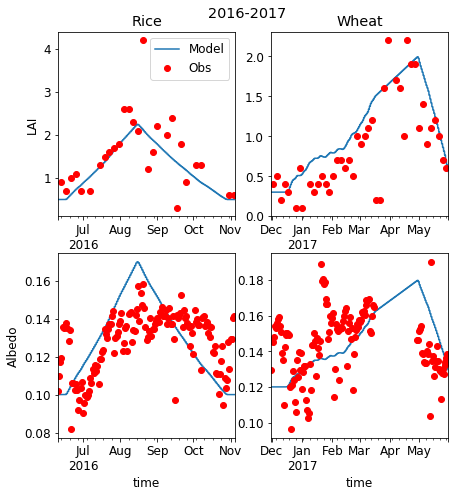

In [26]:
fig,axs=plt.subplots(2,2,figsize=(7,7))
plt.subplots_adjust(hspace=0.2)
fig.suptitle(str(year)+'-'+str(year+1))
fig.subplots_adjust(top=0.93)


ax=axs[0][0]
df_output1.loc[grid].SUEWS.LAI.resample('1h').mean().plot(ax=ax)
lai_obs1.plot(linestyle='',marker='o',color='r',ax=ax,legend=False)
ax.set_ylabel('LAI')
ax.set_title('Rice')
ax.set_xlabel('')

ax=axs[1][0]
df_output1.loc[grid].SUEWS.AlbBulk.resample('1h').mean().plot(ax=ax)
albedo1.plot(marker='o',color='r',linestyle='',ax=ax)
ax.set_ylabel('Albedo')


ax=axs[0][1]
df_output2.loc[grid].SUEWS.LAI.resample('1h').mean().plot(ax=ax)
lai_obs2.plot(linestyle='',marker='o',color='r',ax=ax,legend=False)
ax.set_title('Wheat')
ax.set_xlabel('')

ax=axs[1][1]
df_output2.loc[grid].SUEWS.AlbBulk.resample('1h').mean().plot(ax=ax)
albedo2.plot(marker='o',color='r',linestyle='',ax=ax)

ax=axs[0][0]

ax.legend(['Model','Obs'])

plt.savefig('all_Crop-'+str(year)+'.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [27]:
year=2015
lai,gdd_rice=cal_all_lai_model(year)

name='cropr'
df_output1,df_period1,grid,d11,d21=cal_alb_LAI(name,year,lai)
lai_obs1,albedo1=cal_obs(df_period1,d11,d21)

LAI_s=df_output1.loc[grid].SUEWS.LAI.resample('1h').mean()
LAI_s.index=LAI_s.index.strftime('%j')
lai_obs1=lai_obs1.value_mean
lai_obs1.index=lai_obs1.index.strftime('%j')
gdd_rice=gdd_rice.loc[d11:d21]
gdd_rice.index=gdd_rice.index.strftime('%j')

lai_obs1.index=[int(x) for x in lai_obs1.index]
LAI_s.index=[int(x) for x in LAI_s.index]
gdd_rice.index=[int(x) for x in gdd_rice.index]

2019-12-16 12:00:40,475 — SuPy — INFO — All cache cleared.
2019-12-16 12:00:41,412 — SuPy — INFO — All cache cleared.
2019-12-16 12:00:43,429 — SuPy — INFO — ====================
2019-12-16 12:00:43,430 — SuPy — INFO — Simulation period:
2019-12-16 12:00:43,431 — SuPy — INFO —   Start: 2015-06-10 00:00:00
2019-12-16 12:00:43,432 — SuPy — INFO —   End: 2015-11-07 00:00:00
2019-12-16 12:00:43,433 — SuPy — INFO — 
2019-12-16 12:00:43,435 — SuPy — INFO — No. of grids: 1
2019-12-16 12:00:43,436 — SuPy — INFO — SuPy is running in serial mode
2019-12-16 12:00:52,310 — SuPy — INFO — Execution time: 8.9 s
2019-12-16 12:00:52,311 — SuPy — INFO — ====================



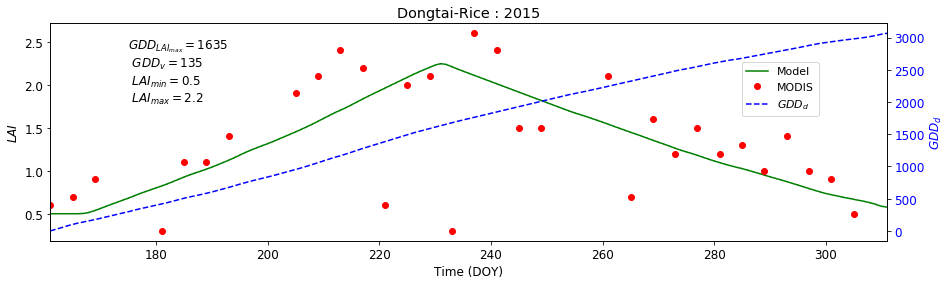

In [28]:
plt.rcParams.update({'font.size': 12})
fig,axs=plt.subplots(1,1,figsize=(15,4))
fig.subplots_adjust(hspace=0)

ax=axs

LAI_s.plot(color='g',ax=ax,label='Model')


lai_obs1.plot(linestyle='',marker='o',color='r',ax=ax,label='MODIS')

ax.set_ylabel('$LAI$')
ax.set_title('Dongtai-Rice : 2015')
ax.set_xlabel('Time (DOY)')
lim=ax.get_xlim()

ax2 = ax.twinx()
gdd_rice.plot( color='b',linestyle='--',ax=ax2)

ax2.set_xlim(lim)
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylabel('$GDD_d$',color='b')


GDD_max=int(gdd_rice.loc[LAI_s[LAI_s==LAI_s.max()].index[0]])
GDD_v=135
lai_max=2.2
lai_min=0.5


text='$GDD_{LAI_{max}}=%d$ \n $GDD_v=%d$ \n $LAI_{min}=%.1f$ \n $LAI_{max}=%.1f$' % (GDD_max,GDD_v,lai_min,lai_max)
ax2.annotate(text,(175,2000),color='k',fontsize=12)

ax.plot([],[],color='b',linestyle='--',label='$GDD_d$')
ax.legend(bbox_to_anchor=(.82, .55),fontsize=11)

plt.savefig('show-LAI-rice.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [29]:
year=2014
lai,gdd_rice=cal_all_lai_model(year)

name='cropw'
df_output1,df_period1,grid,d11,d21=cal_alb_LAI(name,year,lai)
lai_obs1,albedo1=cal_obs(df_period1,d11,d21)

LAI_s=df_output1.loc[grid].SUEWS.LAI.resample('1h').mean()
lai_obs1=lai_obs1.value_mean

with open('LAI/'+name+'-china-'+str(year)+'-MODIS','wb') as f:
        pickle.dump(lai_obs1, f)
with open('LAI/'+name+'-china-'+str(year)+'-Model','wb') as f:
        pickle.dump(LAI_s, f)


2019-12-16 12:01:18,558 — SuPy — INFO — All cache cleared.
2019-12-16 12:01:19,353 — SuPy — INFO — All cache cleared.
2019-12-16 12:01:21,140 — SuPy — INFO — ====================
2019-12-16 12:01:21,141 — SuPy — INFO — Simulation period:
2019-12-16 12:01:21,142 — SuPy — INFO —   Start: 2014-11-30 00:00:00
2019-12-16 12:01:21,142 — SuPy — INFO —   End: 2015-05-31 00:00:00
2019-12-16 12:01:21,144 — SuPy — INFO — 
2019-12-16 12:01:21,146 — SuPy — INFO — No. of grids: 1
2019-12-16 12:01:21,147 — SuPy — INFO — SuPy is running in serial mode
2019-12-16 12:01:31,922 — SuPy — INFO — Execution time: 10.8 s
2019-12-16 12:01:31,923 — SuPy — INFO — ====================



In [30]:
year=2016
lai,gdd_rice=cal_all_lai_model(year)

name='cropr'
df_output1,df_period1,grid,d11,d21=cal_alb_LAI(name,year,lai)
lai_obs1,albedo1=cal_obs(df_period1,d11,d21)

alb_model=df_output1.loc[grid].SUEWS.AlbBulk.resample('1h').mean()
alb_obs=albedo1

with open('albedo/'+name+'-china-'+str(year)+'-obs','wb') as f:
        pickle.dump(alb_obs, f)
with open('albedo/'+name+'-china-'+str(year)+'-Model','wb') as f:
        pickle.dump(alb_model, f)


2019-12-16 12:01:43,341 — SuPy — INFO — All cache cleared.
2019-12-16 12:01:44,103 — SuPy — INFO — All cache cleared.
2019-12-16 12:01:45,935 — SuPy — INFO — ====================
2019-12-16 12:01:45,935 — SuPy — INFO — Simulation period:
2019-12-16 12:01:45,936 — SuPy — INFO —   Start: 2016-06-10 00:00:00
2019-12-16 12:01:45,937 — SuPy — INFO —   End: 2016-11-05 00:00:00
2019-12-16 12:01:45,938 — SuPy — INFO — 
2019-12-16 12:01:45,940 — SuPy — INFO — No. of grids: 1
2019-12-16 12:01:45,941 — SuPy — INFO — SuPy is running in serial mode
2019-12-16 12:01:55,458 — SuPy — INFO — Execution time: 9.5 s
2019-12-16 12:01:55,459 — SuPy — INFO — ====================



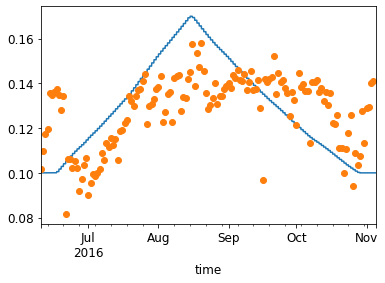

In [31]:
alb_model.plot()
alb_obs.plot(marker='o',linestyle='')

In [44]:
def forcing(year,name,lai):
    if year==2014:
        date2=datetime.datetime(2014,11,30)
        date2_0=datetime.datetime(2014,12,15)
        date2_1=datetime.datetime(2015,5,1)
        date2_2=datetime.datetime(2015,4,16)
        date2_3=datetime.datetime(2015,5,31)

        date1=datetime.datetime(2014,6,10)
        date1_0=datetime.datetime(2014,6,21)
        date1_1=datetime.datetime(2014,8,5)
        date1_2=datetime.datetime(2014,10,1)
        date1_3=datetime.datetime(2014,11,9)
    
    elif year==2015:
        date2=datetime.datetime(2015,11,30)
        date2_0=datetime.datetime(2015,12,10)
        date2_1=datetime.datetime(2016,5,1)
        date2_2=datetime.datetime(2016,4,17)
        date2_3=datetime.datetime(2016,5,25)

        date1=datetime.datetime(2015,6,10)
        date1_0=datetime.datetime(2015,6,20)    
        date1_1=datetime.datetime(2015,8,10)
        date1_2=datetime.datetime(2015,10,2)
        date1_3=datetime.datetime(2015,11,7)

    elif year==2016:
        date2=datetime.datetime(2016,11,30)
        date2_0=datetime.datetime(2016,12,14)
        date2_1=datetime.datetime(2017,5,1)
        date2_2=datetime.datetime(2017,4,15)
        date2_3=datetime.datetime(2017,5,31)

        date1=datetime.datetime(2016,6,10)
        date1_0=datetime.datetime(2016,6,16)
        date1_1=datetime.datetime(2016,8,6)
        date1_2=datetime.datetime(2016,10,1)
        date1_3=datetime.datetime(2016,11,5)
    
    copyfile("./runs/data/" + 'crop' + "_" + 'all' + "_data_60.txt",
             "runs/run1/input/Kc_2012_data_60.txt")
    df_forcing = pd.read_csv('runs/run1' + '/Input/' + 'kc' + '_' + '2012' +
                             '_data_60.txt',
                             sep=' ',
                             parse_dates={'datetime': [0, 1, 2, 3]},
                             keep_date_col=True,
                             date_parser=func_parse_date)

    all_sites_info = pd.read_csv('site_info.csv')
    site_info = all_sites_info[all_sites_info['Site Id'] == name]
    df = pd.DataFrame({
        'Site': [name],
        'Latitude': [site_info['Latitude (degrees)']],
        'Longitude': [site_info['Longitude (degrees)']]
    })

    path_runcontrol = Path('runs/run1' + '/') / 'RunControl.nml'
    df_state_init = sp.init_supy(path_runcontrol)


    grid = df_state_init.index[0]
    df_forcing_run = sp.load_forcing_grid(path_runcontrol, grid)

    if name=='cropr':
        d1=date1
        d2=date1_3
    elif name=='cropw':
        d1=date2
        d2=date2_3        


    df_forcing_run_2=df_forcing_run.loc[d1:d2]
    lai_sub=lai.loc[d1:d2]
    lai_sub.index=[x+datetime.timedelta(hours=12) for x in lai_sub.index]
    a=df_forcing_run_2.loc[lai_sub.index].dropna()
    df_forcing_run_2.loc[a.index,'lai']=lai_sub.loc[a.index]
    df_forcing_run_2.loc[~df_forcing_run_2.index.isin(a.index),'lai']=np.nan
    df_forcing_run_2.lai=df_forcing_run_2.lai.interpolate(limit_direction='both')


    df_state_init ,level= modify_attr(df_state_init, df, name)
    df_state_init.loc[:,'laicalcyes']=0
    mi=df_state_init.loc[:,'laimin'].values[0][2]
    ma=df_state_init.loc[:,'laimax'].values[0][2]
    df_state_init.loc[:,'laimin']=[mi,mi,mi]
    df_state_init.loc[:,'laimax']=[ma,ma,ma]
    
    return df_forcing_run_2,df_state_init,grid,d1,d2

In [45]:
def irr_mod(df_state_init,df_forcing_run_2,year):
    df_state_init.loc[:,'surfacearea']=1
    df_state_init.loc[:,'waterusemethod']=1
    df_state_init.loc[:,'irrfracgrass']=1
    df_state_init.loc[:,'statelimit']=[0.48,0.25,1.3,0.8,   150  ,1.0,30000.0]
    df_state_init.loc[:,'wetthresh']=[0.48,0.25,1.3,0.8,   150  ,1.0,0.5]
    df_forcing_run_2.Wuh=0
    temp=df_forcing_run_2[df_forcing_run_2.index.hour>=22]
    df_forcing_run_2.loc[temp.index,'Wuh']=(1*10000)*(15/100)
    df_forcing_run_2.loc[str(year)+' 10 7':,'Wuh']=0
    return df_state_init,df_forcing_run_2

In [51]:
from gs_util import IQR_compare,obs_sim
def modify_attr_2(df_state_init,g_max,s1):
    df_state_init.maxconductance=g_max
    df_state_init.s1=s1
    return df_state_init

def gs_plot_test(tp,coef,lai,d1,d2,d3,g1,g2,g3,g4,g5,g6,g_max,s1,name,year,alpha=1):

    all_sites_info = pd.read_csv('site_info.csv')
    site_info = all_sites_info[all_sites_info['Site Id'] == name]
    df = pd.DataFrame({
        'Site': [name],
        'Latitude': [site_info['Latitude (degrees)']],
        'Longitude': [site_info['Longitude (degrees)']]
    })    
    
    path_runcontrol = Path('runs/run1'+'/') / 'RunControl.nml'
    df_state_init = sp.init_supy(path_runcontrol)
    grid = df_state_init.index[0]
    df_forcing_run = sp.load_forcing_grid(path_runcontrol, grid)
    
    df_state_init,df_forcing_run=irr_mod(df_state_init,df_forcing_run,year)
    
    a=df_state_init.loc[:,'ohm_coef'].values[0]
    for i in [0,1,2,3]:
        s=4
        a[(s)*4*3+((i)*3)+(0)]=coef[0]
        a[(s)*4*3+((i)*3)+(1)]=coef[1]
        a[(s)*4*3+((i)*3)+(2)]=coef[2]

    df_state_init.loc[:,'ohm_coef']=a
    
    
    df_forcing_run_2=df_forcing_run.loc[d1:d2]
    lai_sub=lai.loc[d1:d2]
    lai_sub.index=[x+datetime.timedelta(hours=12) for x in lai_sub.index]
    a=df_forcing_run_2.loc[lai_sub.index].dropna()
    
    bb=lai_sub[lai_sub<3]
    lai_sub.loc[bb.index]=2.5
    
    
    df_forcing_run_2.loc[a.index,'lai']=lai_sub.loc[a.index]
    df_forcing_run_2.loc[~df_forcing_run_2.index.isin(a.index),'lai']=np.nan
    df_forcing_run_2.lai=df_forcing_run_2.lai.interpolate(limit_direction='both')
    
    
    df_forcing_run_2.qn=sp.util.fill_gap_all(df_forcing_run_2.qn.replace(-999,np.nan))

    df_state_init ,level= modify_attr(df_state_init, df, name)
    df_state_init.loc[:,'laicalcyes']=0
    mi=df_state_init.loc[:,'laimin'].values[0][2]
    ma=df_state_init.loc[:,'laimax'].values[0][2]
    df_state_init.loc[:,'laimin']=[mi,mi,mi]
    df_state_init.loc[:,'laimax']=[ma,ma,ma]    
    

    df_state_init.g1=g1*alpha
    df_state_init.g2=g2
    df_state_init.g3=g3
    df_state_init.g4=g4
    df_state_init.g5=g5
    df_state_init.g6=g6
    df_state_init.loc[:,'netradiationmethod']=0

    
    df_state_init=modify_attr_2(df_state_init,g_max,s1)
    
    if tp=='soil':
        df_forcing_run_2=df_forcing_run_2.loc[d1:d3]
        df_state_init.lai_id = 2.5
    else:
        df_forcing_run_2=df_forcing_run_2.loc[d3:d2]
    
    df_output, df_state_final = sp.run_supy(df_forcing_run_2, df_state_init, save_state=False)


    df_obs=pd.read_csv('runs/run1'+'/Input/'+'kc'+'_2012_data_60.txt',sep=' ',
                                    parse_dates={'datetime': [0, 1, 2, 3]},
                                    keep_date_col=True,
                                    date_parser=func_parse_date)

    df_obs= df_obs.set_index('datetime')
    df_obs=df_obs.loc[d1:d2]
    df_obs=df_obs[df_obs.rain==0]

#     fig,axs=plt.subplots(4,1,figsize=(8,15))
#     plt.subplots_adjust(hspace=.8)
#     plt.rc('font', size=15)

#     ax=axs[0]
    df_obs_temp=df_obs.replace(-999,np.nan)
    
    df=df_output.SUEWS.loc[grid,:]
    df=df.resample('1h',closed='left',label='right').mean()
    
#     IQR_compare('qe','QE',df_obs_temp,df,ax)
#     ax.legend()
#     ax.set_title('QE (test data set-fitted g1-g6)')
#     ax.set_ylabel('QE (W m$^{-2}$)')
#     ax.set_xlabel('Time (UTC)')


#     df=df_output.SUEWS.loc[grid,:]
#     df=df.resample('1h',closed='left',label='right').mean()
#     df_temp=df_obs_temp[df_obs_temp.qe<900]
#     df_temp=df_temp[df_temp.rain==0]
    
    
#     plt.rc('font', size=15)

#     data_for_plot={'IQR':{'obs':df_obs_temp,'model':df}}
#     data_for_plot['obs_sim']={'obs':df_temp,'model':df.loc[df_temp.index,:]}

#     ax=axs[1]
#     obs_sim('qe','QE',df_temp,df.loc[df_temp.index,:],ax)

#     ax.set_ylabel('Model')
#     ax.set_xlabel('Obs')
#     ax.set_title('QE-test data-all season-MAE='+str(np.round(np.mean(abs(df.loc[df_temp.index,:].QE-df_temp.qe)),2)))
    

#     ax=axs[2]
#     df_output.SUEWS.QE.loc[grid,:].resample('1h',closed='left',label='right').mean().plot(ax=ax,label='model')
#     ax.legend()
#     ax=axs[3]
#     df_obs[(df_obs.qe>0)&(df_obs.qe<900)].qe.plot(ax=ax,label='obs')
#     ax.legend()



        
    return df_obs,df_output, df_state_init,df_forcing_run_2

In [47]:
with open('g1-g6/'+'soil'+'-g','rb') as f:
    [g_max,alpha,g1,g2,g3,g4,g5,g6]=pickle.load(f)
s1=5.56

In [48]:
[g_max,alpha,g1,g2,g3,g4,g5,g6]

[40.385579352129994,
 0.6,
 0.452669520187823,
 108.93812668216773,
 0.9353156881014868,
 0.9615560613008041,
 42.26564176071669,
 0.04105463200025355]

In [82]:
coef=[0.2, 0.902, -20.4]

In [83]:
year=2016
name='cropr'
w='wo'
tp='soil'


if year==2014:
    date2=datetime.datetime(2014,11,30)
    date2_0=datetime.datetime(2014,12,15)
    date2_1=datetime.datetime(2015,5,1)
    date2_2=datetime.datetime(2015,4,16)
    date2_3=datetime.datetime(2015,5,31)

    date1=datetime.datetime(2014,6,10)
    date1_0=datetime.datetime(2014,6,21)
    date1_1=datetime.datetime(2014,8,5)
    date1_2=datetime.datetime(2014,10,1)
    date1_3=datetime.datetime(2014,11,9)
    
    date4=datetime.datetime(2014,7,1)
    

elif year==2015:
    date2=datetime.datetime(2015,11,30)
    date2_0=datetime.datetime(2015,12,10)
    date2_1=datetime.datetime(2016,5,1)
    date2_2=datetime.datetime(2016,4,17)
    date2_3=datetime.datetime(2016,5,25)

    date1=datetime.datetime(2015,6,10)
    date1_0=datetime.datetime(2015,6,20)    
    date1_1=datetime.datetime(2015,8,10)
    date1_2=datetime.datetime(2015,10,2)
    date1_3=datetime.datetime(2015,11,7)
    
    date4=datetime.datetime(2015,7,1)

elif year==2016:
    date2=datetime.datetime(2016,11,30)
    date2_0=datetime.datetime(2016,12,14)
    date2_1=datetime.datetime(2017,5,1)
    date2_2=datetime.datetime(2017,4,15)
    date2_3=datetime.datetime(2017,5,31)

    date1=datetime.datetime(2016,6,10)
    date1_0=datetime.datetime(2016,6,16)
    date1_1=datetime.datetime(2016,8,6)
    date1_2=datetime.datetime(2016,10,1)
    date1_3=datetime.datetime(2016,11,5)
    
    date4=datetime.datetime(2016,7,1)
    

lai,gdd_rice=cal_all_lai_model(year)
df_forcing_run_2,df_state_init,grid,d1,d2=forcing(year,name,lai)

d3=date4
df_obs,df_output, df_state_init,df_forcing_run_2=gs_plot_test(tp,coef,lai,d1,d2,d3,g1,g2,g3,g4,g5,g6,g_max,s1,name,year,alpha)

2019-12-16 12:10:47,595 — SuPy — INFO — All cache cleared.
2019-12-16 12:10:48,366 — SuPy — INFO — All cache cleared.
2019-12-16 12:10:50,253 — SuPy — INFO — All cache cleared.
2019-12-16 12:10:51,025 — SuPy — INFO — All cache cleared.
2019-12-16 12:10:53,000 — SuPy — INFO — ====================
2019-12-16 12:10:53,001 — SuPy — INFO — Simulation period:
2019-12-16 12:10:53,002 — SuPy — INFO —   Start: 2016-06-10 00:00:00
2019-12-16 12:10:53,004 — SuPy — INFO —   End: 2016-07-01 00:00:00
2019-12-16 12:10:53,005 — SuPy — INFO — 
2019-12-16 12:10:53,007 — SuPy — INFO — No. of grids: 1
2019-12-16 12:10:53,008 — SuPy — INFO — SuPy is running in serial mode
2019-12-16 12:10:54,479 — SuPy — INFO — Execution time: 1.5 s
2019-12-16 12:10:54,479 — SuPy — INFO — ====================



In [84]:
df_obs=df_obs[df_obs.rain==0]
df_mod=df_output.SUEWS.QE.loc[grid,:].resample('1h',closed='left',label='right').mean()
qe_obs=df_obs[(df_obs.qe>0)&(df_obs.qe<900)].qe
qe_mod=df_mod.loc[qe_obs.index].dropna()
diff_qe=(qe_obs-qe_mod)
abnorm=diff_qe[diff_qe>250]
abnorm=abnorm[qe_mod[abnorm.index]<100]

In [85]:
df_obs=df_obs[~df_obs.index.isin(abnorm.index)]

In [86]:
df_obs=df_obs[df_obs.rain==0]
df_obs=df_obs.replace(-999,np.nan)
df_obs=df_obs[df_obs.qe<800]
df_obs=df_obs[df_obs.qh>-500]
df_all= df_obs
if tp=='soil':
    df_an=df_all.loc[d1:d3]
else:
    df_an=df_all.loc[d3:d2]

df_an.index=pd.to_datetime(df_an.index)
df_an=df_an

out=df_output.SUEWS.loc[grid]


if tp=='soil':
    out=out.loc[d1:d3]
else:
    out=out.loc[d3:d2]


out=out.resample('1h',closed='left',label='right').mean()

df_an['qs']=df_an.qn-df_an.qe-df_an.qh
df_an=df_an[df_an.qs>-300]


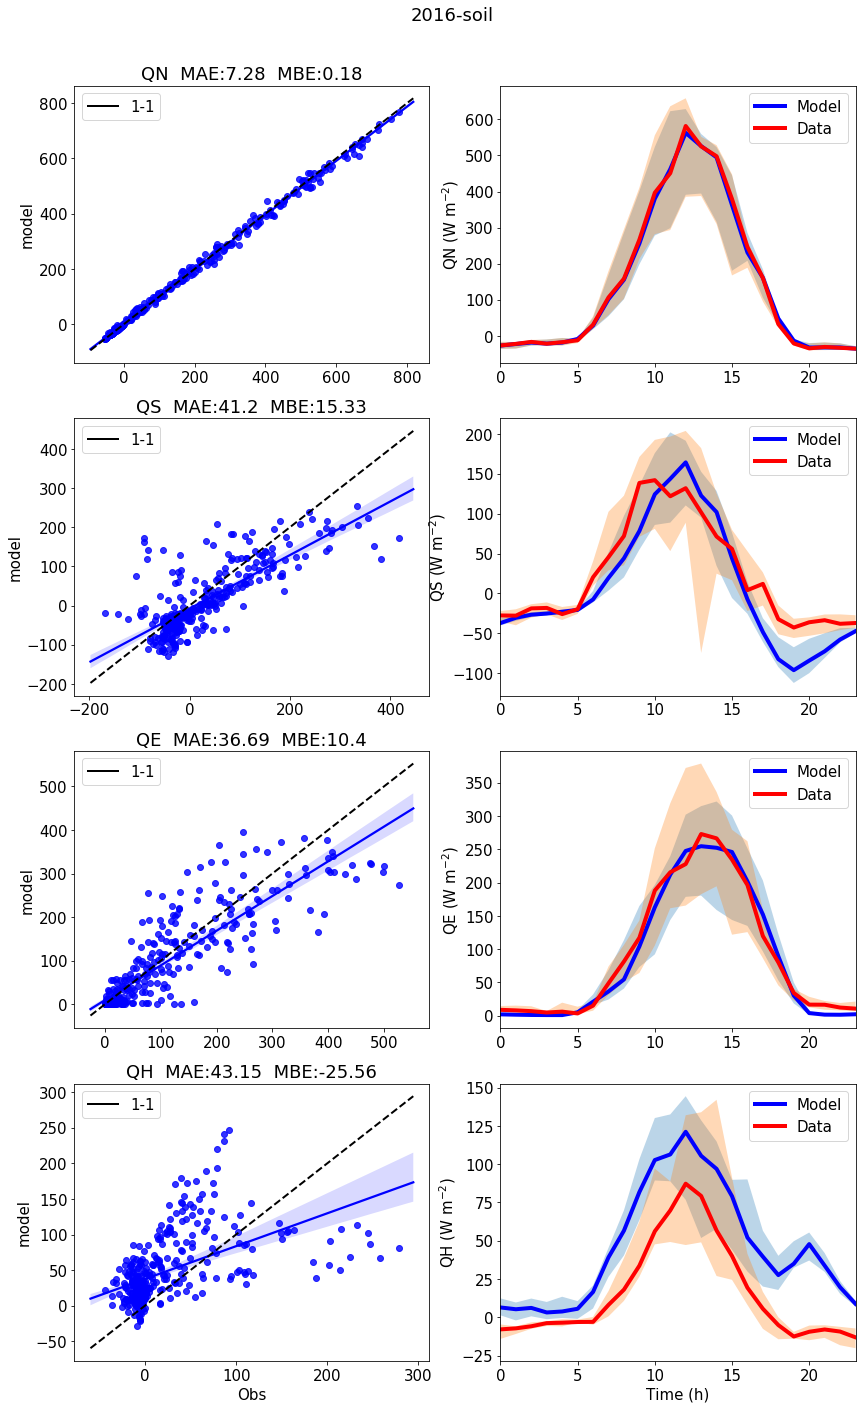

In [87]:

var_meas=['qn','qs','qe','qh']
var_model=['QN','QS','QE','QH']

fig,axs=plt.subplots(len(var_meas),2,figsize=(14,22))
plt.rc('font', size=15)
fig.suptitle(str(year)+'-'+tp)
fig.subplots_adjust(top=0.93)

counter=-1
for varmeas,varmodel in zip(var_meas,var_model):
    counter=counter+1
    
    meas=df_an[varmeas].dropna()
    

    ax=axs[counter][0]
    temp=df_an.loc[meas.index]
    aa=out.loc[temp.index][varmodel].dropna()
    obs_sim(varmeas,varmodel,temp.loc[aa.index],out.loc[aa.index],ax)
    ax.set_ylabel('model')
    
    MAE=np.round(np.mean(abs(temp.loc[aa.index][varmeas]-out.loc[aa.index][varmodel])),2)
    MBE=np.round(np.mean((temp.loc[aa.index][varmeas]-out.loc[aa.index][varmodel])),2)

    if counter==len(var_model)-1:
        ax.set_xlabel('Obs')
    ax.set_title(varmodel+'  MAE:'+str(MAE)+'  MBE:'+str(MBE))
    
    ax=axs[counter][1]
    IQR_compare(varmeas,varmodel,temp,out.loc[temp.index],ax)
    ax.legend()
    if counter==len(var_model)-1:
        ax.set_xlabel('Time (h)')
    ax.set_ylabel(varmodel+' (W m$^{-2}$)')
# plt.savefig('china-SEB-'+tp+'-'+str(year)+'.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [89]:
all_data={}
all_data['model']=out.QE
all_data['obs']=df_an.qe
with open('surface_conductance/'+'soil-china-'+str(year),'wb') as f:
    pickle.dump(all_data, f)

In [52]:
# df_output.SUEWS.SMD.loc[grid,:].resample('1h').mean().plot()

In [124]:
# plt.scatter(df_obs.loc[abnorm.index,['qe']],df_obs.loc[abnorm.index,['kdown']],color='r')
# plt.scatter(df_obs.loc[abnorm.index,['qh']],df_obs.loc[abnorm.index,['kdown']])

In [125]:
# fig,axs=plt.subplots(1,2,figsize=(14,5))
# df_obs_temp=df_obs.replace(-999,np.nan)
# df_obs_temp=df_obs_temp[~df_obs_temp.index.isin(abnorm.index)]
# df_obs_temp=df_obs_temp[df_obs_temp.qe<900]
# df=df_output.SUEWS.loc[grid,:]
# df=df.resample('1h',closed='left',label='right').mean()
# # IQR_compare('qe','QE',df_obs,df,ax)
# ax=axs[0]
# MAE=np.round(np.mean(abs(df_obs_temp.qe-df.loc[df_obs_temp.index,:].QE)),2)
# MBE=np.round(np.mean((df_obs_temp.qe-df.loc[df_obs_temp.index,:].QE)),2)

# obs_sim('qe','QE',df_obs_temp,df.loc[df_obs_temp.index,:],ax)
# ax.set_ylabel('QE-Model')
# ax.set_xlabel('QE-Obs')
# ax.set_title('rice-'+str(year)+'  MAE:'+str(MAE)+'  MBE:'+str(MBE))

# ax=axs[1]
# IQR_compare('qe','QE',df_obs_temp,df.loc[df_obs_temp.index,:],ax)
# ax.legend()
# ax.set_title('QE')
# ax.set_ylabel('QE (W m$^{-2}$)')
# ax.set_xlabel('Time (UTC)')



In [57]:
# fig,axs=plt.subplots(1,2,figsize=(14,5))
# ax=axs[0]
# obs_sim('qn','QN',df_obs_temp,df.loc[df_obs_temp.index,:],ax)
# MAE=np.round(np.mean(abs(df_obs_temp.qn-df.loc[df_obs_temp.index,:].QN)),2)
# MBE=np.round(np.mean((df_obs_temp.qn-df.loc[df_obs_temp.index,:].QN)),2)

# ax.set_ylabel('QN-Model')
# ax.set_xlabel('QN-Obs')
# ax.set_title('rice-'+str(year)+'  MAE:'+str(MAE)+'  MBE:'+str(MBE))


# ax=axs[1]
# IQR_compare('qn','QN',df_obs_temp,df.loc[df_obs_temp.index,:],ax)
# ax.legend()
# ax.set_title('QN')
# ax.set_ylabel('QN (W m$^{-2}$)')
# ax.set_xlabel('Time (UTC)')

# plt.savefig('Rice-QN-'+str(year)+w+'.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [58]:
# df_obs_temp=df_obs_temp[(df_obs_temp.qh<250)&(df_obs_temp.qh>-150)]
# fig,axs=plt.subplots(1,2,figsize=(14,5))
# ax=axs[0]
# obs_sim('qh','QH',df_obs_temp,df.loc[df_obs_temp.index,:],ax)

# MAE=np.round(np.mean(abs(df_obs_temp.qh-df.loc[df_obs_temp.index,:].QH)),2)
# MBE=np.round(np.mean((df_obs_temp.qh-df.loc[df_obs_temp.index,:].QH)),2)
# ax.set_ylabel('QH-Model')
# ax.set_xlabel('QH-Obs')
# ax.set_title('rice-'+str(year)+'  MAE:'+str(MAE)+'  MBE:'+str(MBE))


# ax=axs[1]
# IQR_compare('qh','QH',df_obs_temp,df.loc[df_obs_temp.index,:],ax)
# ax.legend()
# ax.set_title('QH')
# ax.set_ylabel('QH (W m$^{-2}$)')
# ax.set_xlabel('Time (UTC)')
# plt.savefig('Rice-QH-'+str(year)+w+'.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)


In [59]:
# delqh=df_obs_temp.qh-df.loc[df_obs_temp.index,:].QH
# delqn=df_obs_temp.qn-df.loc[df_obs_temp.index,:].QN
# delqn.groupby(delqn.index.hour).median().plot(color='r',label='$\Delta QN$')
# delqh.groupby(delqh.index.hour).median().plot(color='b',label='$\Delta QH$')
# plt.title('Rice-'+str(year))
# plt.legend()
# plt.savefig('Rice-diff-'+str(year)+'.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [60]:
# df_obs=df_obs[df_obs.rain==0]
# df_mod=df_output.SUEWS.QE.loc[grid,:].resample('1h',closed='left',label='right').mean()
# qe_obs=df_obs[(df_obs.qe>0)&(df_obs.qe<900)].qe
# qe_mod=df_mod.loc[qe_obs.index].dropna()
# diff_qe=(qe_obs-qe_mod)
# abnorm=diff_qe[diff_qe>250]
# abnorm=abnorm[qe_mod[abnorm.index]<100]
# df_obs_temp=df_obs.replace(-999,np.nan)
# df_obs_temp=df_obs_temp[~df_obs_temp.index.isin(abnorm.index)]
# df_obs_temp=df_obs_temp[df_obs_temp.qe<900]
# df=df_output.SUEWS.loc[grid,:]
# df=df.resample('1h',closed='left',label='right').mean()


# df_obs_temp['qs']=df_obs_temp.qn-df_obs_temp.qh-df_obs_temp.qe
# df_obs_temp=df_obs_temp[df_obs_temp.qs>-300]
# df_obs_temp=df_obs_temp[(df_obs_temp.qh<250)&(df_obs_temp.qh>-150)]
# fig,axs=plt.subplots(1,2,figsize=(14,5))
# ax=axs[0]
# obs_sim('qs','QS',df_obs_temp,df.loc[df_obs_temp.index,:],ax)

# MAE=np.round(np.mean(abs(df_obs_temp.qs-df.loc[df_obs_temp.index,:].QS)),2)
# MBE=np.round(np.mean((df_obs_temp.qs-df.loc[df_obs_temp.index,:].QS)),2)
# ax.set_ylabel('QS-Model')
# ax.set_xlabel('QS-Obs')
# ax.set_title('rice-'+str(year)+'  MAE:'+str(MAE)+'  MBE:'+str(MBE))


# ax=axs[1]
# IQR_compare('qs','QS',df_obs_temp,df.loc[df_obs_temp.index,:],ax)
# ax.legend()
# ax.set_title('QS')
# ax.set_ylabel('QS (W m$^{-2}$)')
# ax.set_xlabel('Time (UTC)')
# plt.savefig('Rice-QS-'+str(year)+w+'.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.01)

In [1414]:
# coef=[ 4.30240648e-02,  4.10143443e-01, -5.78969971e+01]
# # coef=[0.5,0.21,-39.1]
# coef[0]=6*coef[0]
# # coef[1]=6*coef[1]
# coef[2]=-30
# coef

In [594]:
# year=2015
# name='cropr'
# lai=cal_all_lai_model(year)
# df_forcing_run_2,df_state_init,grid,d1,d2=forcing(year,name,lai)
# alpha=100*.28
# df_obs,df_output, df_state_init,df_forcing_run_2=gs_plot_test(coef,lai,d1,d2,g1,g2,g3,g4,g5,g6,g_max,s1,name,year,alpha)

In [595]:
# df_obs=df_obs[df_obs.rain==0]
# df_mod=df_output.SUEWS.QE.loc[grid,:].resample('1h',closed='left',label='right').mean()
# qe_obs=df_obs[(df_obs.qe>0)&(df_obs.qe<900)].qe
# qe_mod=df_mod.loc[qe_obs.index].dropna()
# diff_qe=(qe_obs-qe_mod)
# abnorm=diff_qe[diff_qe>250]
# abnorm=abnorm[qe_mod[abnorm.index]<100]
# df_obs_temp=df_obs.replace(-999,np.nan)
# df_obs_temp=df_obs_temp[~df_obs_temp.index.isin(abnorm.index)]
# df_obs_temp=df_obs_temp[df_obs_temp.qe<900]
# df=df_output.SUEWS.loc[grid,:]
# df=df.resample('1h',closed='left',label='right').mean()


# df_obs_temp['qs']=df_obs_temp.qn-df_obs_temp.qh-df_obs_temp.qe
# df_obs_temp=df_obs_temp[df_obs_temp.qs>-300]
# df_obs_temp=df_obs_temp[(df_obs_temp.qh<250)&(df_obs_temp.qh>-150)]
# fig,axs=plt.subplots(1,2,figsize=(14,5))
# ax=axs[0]
# obs_sim('qs','QS',df_obs_temp,df.loc[df_obs_temp.index,:],ax)

# MAE=np.round(np.mean(abs(df_obs_temp.qs-df.loc[df_obs_temp.index,:].QS)),2)
# MBE=np.round(np.mean((df_obs_temp.qs-df.loc[df_obs_temp.index,:].QS)),2)
# ax.set_ylabel('QH-Model')
# ax.set_xlabel('QH-Obs')
# ax.set_title('rice-'+str(year)+'  MAE:'+str(MAE)+'  MBE:'+str(MBE))


# ax=axs[1]
# IQR_compare('qs','QS',df_obs_temp,df,ax)
# ax.legend()
# ax.set_title('QH')
# ax.set_ylabel('QH (W m$^{-2}$)')
# ax.set_xlabel('Time (UTC)')